In [4]:

#implementing grovers algorithm for states 101 and 110 on 3 qubits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('default')
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import GroverOperator
n = 3
grover_circuit = QuantumCircuit(n)
for i in range(n):
    grover_circuit.h(i)

def grover_iteration(q = QuantumCircuit):
    q.cz(2,0)
    q.cz(1,0)
    for i in range(q.num_qubits):
        q.h(i)
        q.x(i) 
    return q


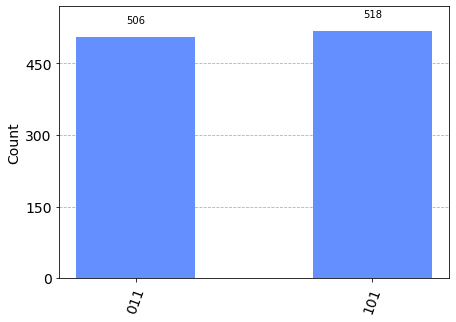

In [5]:
#finish up implementation of algorithm and run it on simulator
from qiskit.visualization import plot_histogram
state_prep = QuantumCircuit(3)
for i in range(3):
    state_prep.h(i)
oracle = QuantumCircuit(3)
oracle.cz(2,0)
oracle.cz(1,0)
grover_circuit = GroverOperator(oracle, state_preparation=state_prep, insert_barriers=True)
grover_circuit.decompose()
circuit = state_prep
groverC1 = circuit.compose(grover_circuit.decompose())
groverC1.measure_all()
aer_sim = Aer.get_backend('aer_simulator')

transpiled_grover_circuit = transpile(groverC1, aer_sim)
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)


In [6]:
#run on real hardware
token = #use your own specific token

from qiskit.providers.ibmq import least_busy
provider = IBMQ.enable_account(token)
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: int(x.configuration().n_qubits) >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_lima


In [7]:
from qiskit.tools.monitor import job_monitor
transpiled_grover_circuit = transpile(groverC1, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)


Job Status: job has successfully run


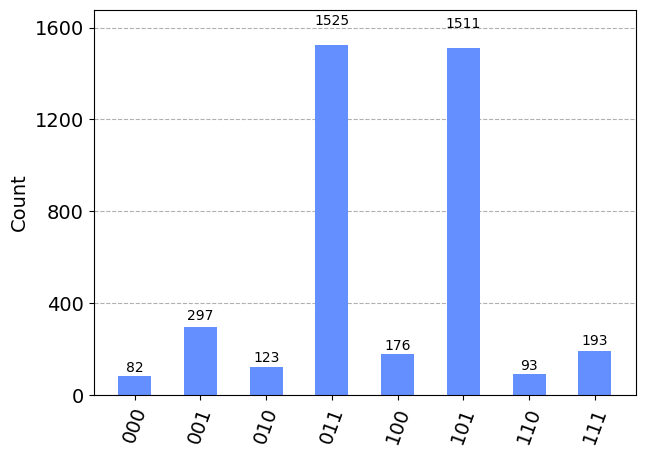

In [10]:
from matplotlib import style 
style.use('default')
results = job.result()
answer = results.get_counts(groverC1)
plot_histogram(answer)